In [33]:
### PREREQUISTIES
### (many used only in one notebook...)

import os
import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'
pd.set_option('display.max_rows', 150)

import numpy as np
import logging ### to monitor the code
from bs4 import BeautifulSoup
import pickle
import math
import random
import sys
import csv
import unicodedata
import seaborn as sns


import nltk
from nltk.collocations import *

import networkx as nx

import matplotlib.pyplot as plt

# There is a lot of changes in Plotly nowadays. Perhaps some modifications of the code will be needed at some point
import plotly
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
plotly.offline.init_notebook_mode(connected=True)

from scipy import stats

import xml.etree.cElementTree as ET
from urllib.request import urlopen

import gspread
from gspread_dataframe import get_as_dataframe, set_with_dataframe

!pip install sddk # our own package for working with sciencedata.dk
from  sddk import * # import all functions

In [34]:
conf = configure_session_and_url("SDAM_root", "648597@au.dk")

sciencedata.dk username (format '123456@au.dk'): 648597@au.dk
sciencedata.dk password: ··········
connection with shared folder established with you as its owner
endpoint variable has been configured to: https://sciencedata.dk/files/SDAM_root/


In [0]:
### authorize google sheets
from google.colab import auth
auth.authenticate_user()
from oauth2client.client import GoogleCredentials
gc = gspread.authorize(GoogleCredentials.get_application_default())
# establish connection with particular sheet by its url:

sh_inaf = gc.open_by_url("https://docs.google.com/spreadsheets/d/1eExXAkrKiPp421FPsOsKhQtp9gYOs7xtVA0NkIQ-8Ko/edit?usp=sharing")

# RESULTS SPREADSHEET
sh = gc.open_by_url("https://docs.google.com/spreadsheets/d/1aRNUQeci2aWApkXk69OI_9YINL8YXXnornKkVi0LZeE/edit?usp=sharing")
# WORKING DATA SPREADSHEET
#sh_working = gc.open_by_url("https://docs.google.com/spreadsheets/d/12wOBjRGgoBSIXoN_9cbG32eKA8UAWwWB9YCvpb8xFnU/edit?usp=sharing")

# Analysis of the results

In [0]:
results = read_file("SDAM_data/OGL/theos_results_20200220.json", "df", conf)

In [69]:
results.columns

Index(['filename', 'author', 'title', 'author_id', 'doc_id', 'raw_date',
       'date_avr', 'date_probs', 'date_manual', 'provenience', 'wordcount',
       'lemmata_wordcount', 'theos_count', 'num_of_sents', 'theosTF', 'kcal',
       'settl', 'devextra', 'period', 'zeus_count', 'conc_theos_5',
       'conc_theos_7', 'conc_theos_9', 'sent_theos', 'terms_5', 'terms_7',
       'terms_9', 'terms_sent', 'moral_terms_count5', 'moral_terms_count7',
       'moral_terms_count9', 'moral_terms_count_sent', 'theos_5_moral_load',
       'theos_7_moral_load', 'theos_9_moral_load', 'theos_sent_moral_load'],
      dtype='object')

In [0]:
LG_results_theos = results[results["theos_count"]>1]

In [71]:
LG_results_theos["terms_7"].tolist()

[[],
 ['εὐγενής', 'ἀρετή'],
 ['εὐδοξία', 'εὐκάρδιος'],
 ['εὔνοια'],
 ['τιμή', 'ἀρετή'],
 ['εὐπατρίδης', 'τιμή', 'ἀρετή', 'εὐγενής', 'ἀγαθός', 'ἐσθλός'],
 ['εὐσεβής', 'τίμιος'],
 ['εὐσεβής'],
 ['τιμή'],
 ['εὔψυχος', 'ἀγαθός', 'ἐσθλός'],
 ['τιμή'],
 ['εὔκλεια', 'εὐγενής'],
 ['τιμή'],
 ['ἐσθλός', 'ἀγαθός'],
 ['ἐσθλός'],
 ['πάνδικος'],
 ['ἐσθλός', 'τιμή'],
 ['εὐνομία'],
 ['ἐσθλός'],
 [],
 ['εὔνοια'],
 ['εὐσεβής'],
 [],
 ['εὔνοια', 'τιμή', 'εὐδαιμονία', 'ἀγαθός'],
 [],
 [],
 [],
 [],
 ['εὐσεβής'],
 ['ἀρετή'],
 [],
 ['ἀξιόπιστος',
  'δικαιοσύνη',
  'τιμή',
  'εὐδαιμονία',
  'εὔλογος',
  'ἀγαθός',
  'ἀρετή'],
 [],
 ['εὐσεβής', 'εὐγενής', 'θεμιτός', 'εὔνοια', 'ἀγαθός'],
 [],
 ['εὐθημοσύνη',
  'τιμή',
  'θεμιτός',
  'ἀρετή',
  'εὔλογος',
  'δικαιοσύνη',
  'τίμιος',
  'ἀγαθός'],
 ['εὔνοια'],
 ['τιμή'],
 ['εὐσεβής',
  'ἀγαθοεργός',
  'τιμή',
  'εὐδαιμονία',
  'ἀγαθός',
  'τίμιος',
  'δικαιοσύνη'],
 ['εὐγνώμων',
  'τίμιος',
  'τιμή',
  'ἀρετή',
  'τιμητέος',
  'κόλασις',
  'εὔλογος',
  'ἀγαθός'],


In [72]:
LG_results_theos["theos_7_moral_load"].tolist()

[0.0,
 0.0569335265,
 0.0403861054,
 0.0147670901,
 0.0092967451,
 0.0116571567,
 0.0264681555,
 0.0032833254,
 0.0024161939,
 0.0171017291,
 0.0038515362,
 0.0249533353,
 0.0062525473,
 0.0089303119,
 0.010173146,
 0.0134767173,
 0.0072184626,
 0.0095914189,
 0.004639577,
 0.0,
 0.0056692186,
 0.0029361129,
 0.0,
 0.0029040716,
 0.0,
 0.0,
 0.0,
 0.0,
 0.1293682796,
 0.0031779661,
 0.0,
 0.00630022,
 0.0,
 0.0077334614,
 0.0,
 0.0232149666,
 0.0294548928,
 0.020989229,
 0.0086532115,
 0.0374044565,
 0.0,
 0.0121185131,
 0.0040713796,
 0.0048800239,
 0.0111485859,
 0.0,
 0.0059152127,
 0.016844675,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.118,
 0.0,
 0.0059226933,
 0.0097425276,
 0.0,
 0.0206242979,
 0.0145814161,
 0.0,
 0.0222055888,
 0.0,
 0.0586587236,
 0.0214586127,
 0.0355869197,
 0.0643712575,
 0.0,
 0.0110181346,
 0.0440799397,
 0.0,
 0.0046257457,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0148346868,
 0.0,
 0.0113549054,
 0.0,
 0.0117826391,
 0.0,

In [73]:
len(LG_results_theos)

688

In [74]:
LG_results_theos.groupby("period")["theos_7_moral_load"].describe()

,count,mean,std,min,25%,50%,75%,max
period,,,,,,,,
archaic,9.0,0.013469,0.010542,0.0,0.002597,0.011958,0.023300,0.027930
classical,200.0,0.017736,0.032050,0.0,0.000000,0.003231,0.020307,0.188550
hellenistic,25.0,0.011383,0.027895,0.0,0.000000,0.000000,0.008631,0.136064
roman,454.0,0.016221,0.032279,0.0,0.000000,0.006417,0.020285,0.373405


In [76]:
LG_results_theos.groupby("date_avr")["theos_7_moral_load"].describe()

,count,mean,std,min,25%,50%,75%,max
date_avr,,,,,,,,
-7.5,2.0,0.002212,0.000544,0.001828,0.002020,0.002212,0.002405,0.002597
-7.0,3.0,0.021443,0.008398,0.011958,0.018200,0.024441,0.026186,0.027930
-6.0,3.0,0.009722,0.009077,0.000000,0.005597,0.011193,0.014584,0.017974
-5.5,1.0,0.023300,NaN,0.023300,0.023300,0.023300,0.023300,0.023300
-5.0,14.0,0.008622,0.009114,0.000000,0.001908,0.005440,0.013981,0.027788
-4.5,30.0,0.013848,0.025306,0.000000,0.002538,0.005961,0.013022,0.129368
-4.0,84.0,0.019469,0.033011,0.000000,0.000000,0.005348,0.022427,0.188550
-3.5,55.0,0.022561,0.037613,0.000000,0.000000,0.000000,0.029362,0.173807
-3.0,17.0,0.007932,0.028655,0.000000,0.000000,0.000000,0.000000,0.118000


In [24]:
LG_results_theos.groupby("date_avr")["theos_7_moral_load"].describe()

,count,mean,std,min,25%,50%,75%,max
date_avr,,,,,,,,
-7.5,2.0,0.021045,0.000335,0.020808,0.020926,0.021045,0.021163,0.021282
-7.0,10.0,0.162459,0.195781,0.000000,0.000000,0.043660,0.358033,0.463000
-5.5,1.0,0.145957,NaN,0.145957,0.145957,0.145957,0.145957,0.145957
-5.0,11.0,0.228626,0.125245,0.017734,0.131990,0.215598,0.308252,0.406323
-4.5,27.0,0.355136,0.362828,0.033050,0.131270,0.221228,0.419176,1.552208
-4.0,73.0,0.418259,0.584602,-0.141011,0.028662,0.198735,0.523805,2.949427
-3.5,43.0,0.496903,0.741985,0.000000,0.000000,0.291679,0.520323,3.332075
-3.0,15.0,0.465012,0.634840,0.000000,0.000000,0.000000,0.772393,1.780357
-2.5,1.0,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000


In [18]:
### pagan data
LG_results_theos[LG_results_theos["provenience"]=="pagan"].groupby("date_avr")["theos_7_moral_load"].describe()

,count,mean,std,min,25%,50%,75%,max
date_avr,,,,,,,,
-7.5,2.0,0.021045,0.000335,0.020808,0.020926,0.021045,0.021163,0.021282
-7.0,3.0,0.152641,0.193744,0.000000,0.043660,0.087319,0.228961,0.370603
-5.5,1.0,0.145957,NaN,0.145957,0.145957,0.145957,0.145957,0.145957
-5.0,11.0,0.228626,0.125245,0.017734,0.131990,0.215598,0.308252,0.406323
-4.5,25.0,0.289902,0.265770,0.033050,0.117235,0.208660,0.313429,1.049464
-4.0,71.0,0.425782,0.590572,-0.141011,0.037398,0.198735,0.530622,2.949427
-3.5,37.0,0.533555,0.788377,0.000000,0.000000,0.291679,0.554130,3.332075
-3.0,2.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
-2.5,1.0,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000


In [0]:
LG_results_theos[""]

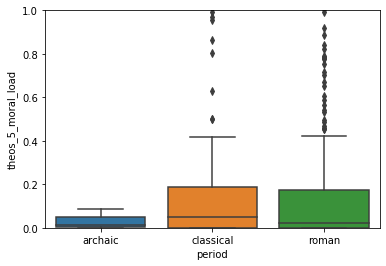

In [0]:
sns.boxplot(x="period", y="theos_5_moral_load", data=LG_results_theos.sort_values("period", ascending=True))
plt.ylim(0, 1)
plt.savefig(gdrive_root + "figures/boxplot_theos5.png", bbox_inches="tight")

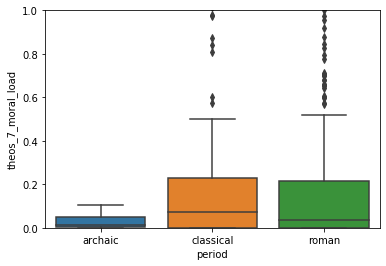

In [0]:
sns.boxplot(x="period", y="theos_7_moral_load", data=LG_data_results[LG_data_results["theos_count"]>0].sort_values("period", ascending=True))
plt.ylim(0, 1)
plt.savefig(gdrive_root + "figures/boxplot_theos7.png", bbox_inches="tight")

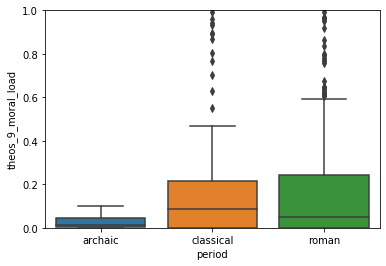

In [0]:
sns.boxplot(x="period", y="theos_9_moral_load", data=LG_data_results[LG_data_results["theos_count"]>0].sort_values("period", ascending=True))
plt.ylim(0, 1)
plt.savefig(gdrive_root + "figures/boxplot_theos9.png", bbox_inches="tight")

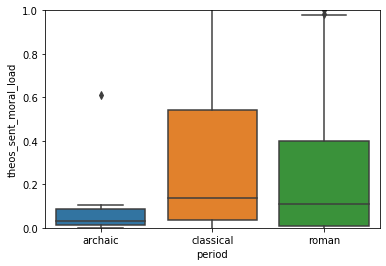

In [0]:
sns.boxplot(x="period", y="theos_sent_moral_load", data=LG_data_results[LG_data_results["theos_count"]>0].sort_values("period", ascending=True))
plt.ylim(0, 1)
plt.savefig(gdrive_root + "figures/boxplot_sent_theos.png", bbox_inches="tight")


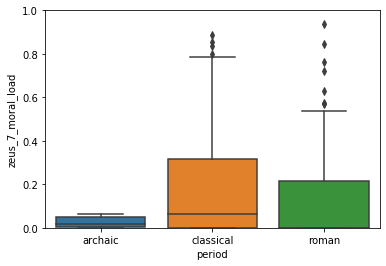

In [0]:
LG_data_results.sort_values("period", inplace=True)

sns.boxplot(x="period", y="zeus_7_moral_load", data=LG_data_results[LG_data_results["zeus_count"]>0])
plt.ylim(0, 1)
plt.savefig(gdrive_root + "figures/boxplot_zeus7.png", bbox_inches="tight")

In [0]:
def ecdf(data):
    """ Compute ECDF """
    x = np.sort(data)
    n = x.size
    y = np.arange(1, n+1) / n
    return (x,y)

def plot_ecdf(dataframe, data_column, selection_column, selection_value, color):
  data_values = np.array(dataframe[dataframe[selection_column]==selection_value][data_column])
  x, y = ecdf(data_values)
  return sns.scatterplot(x, y, color=color)

(0, 10)

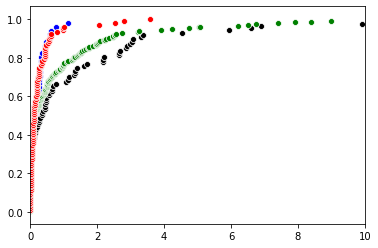

In [0]:
plot_ecdf(LG_data_results[LG_data_results["theos_count"]>0], "theos_7_moral_load", "century", -4.5, "blue")
plot_ecdf(LG_data_results[LG_data_results["theos_count"]>0], "theos_7_moral_load", "century", -3.5, "black")
plot_ecdf(LG_data_results[LG_data_results["theos_count"]>0][LG_data_results[LG_data_results["theos_count"]>0]["provenience"]=="pagan"], "theos_7_moral_load", "period", "roman", "green")
plot_ecdf(LG_data_results[LG_data_results["theos_count"]>0][LG_data_results[LG_data_results["theos_count"]>0]["provenience"]=="christian"], "theos_7_moral_load", "period", "roman", "red")
plt.xlim(0,10)

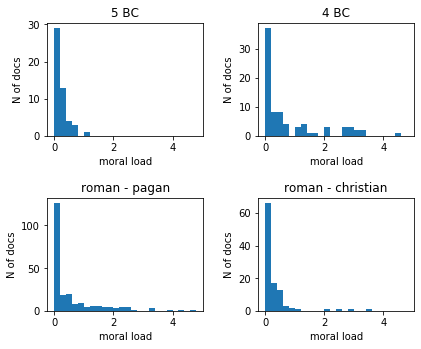

In [0]:
our_bins = list(np.array(range(25)) /5)
LG_results_theos = LG_data_results[LG_data_results["theos_count"]>0]

fig, axs = plt.subplots(2, 2)
axs[0, 0].hist(LG_results_theos[LG_results_theos["century"]==-4.5]["theos_7_moral_load"], bins=our_bins)
axs[0, 0].set_title('5 BC')
axs[0, 1].hist(LG_results_theos[LG_results_theos["century"]==-3.5]["theos_7_moral_load"], bins=our_bins, rwidth=1)
axs[0, 1].set_title('4 BC')
axs[1, 0].hist(LG_results_theos[(LG_results_theos["provenience"]=="pagan") & (LG_results_theos["period"]=="roman")]["theos_7_moral_load"], bins=our_bins, rwidth=1)
axs[1, 0].set_title('roman - pagan')
axs[1, 1].hist(LG_results_theos[LG_results_theos["provenience"]=="christian"]["theos_7_moral_load"], bins=our_bins, rwidth=1)
axs[1, 1].set_title('roman - christian')

for ax in axs.flat:
    ax.set(xlabel='moral load', ylabel='N of docs')



plt.subplots_adjust(top=1, bottom=0, left=0.10, right=0.95, hspace=0.55,
                    wspace=0.35)
plt.savefig(gdrive_root + "figures/hist_moral_counts.png", bbox_inches="tight")

(0, 1)

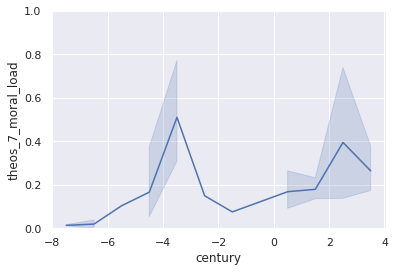

In [0]:
sns.set(color_codes=True)
sns.lineplot(x="century", y="theos_7_moral_load", data=LG_results_theos)
plt.savefig(gdrive_root + "figures/regr_century.png")
plt.ylim(0, 1)

(0, 1)

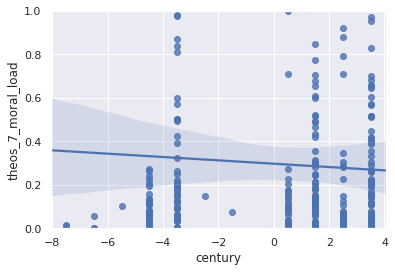

In [0]:
sns.set(color_codes=True)
sns.regplot(x="century", y="theos_7_moral_load", data=LG_results_theos)
plt.savefig(gdrive_root + "figures/regr_century.png")
plt.ylim(0, 1)

(0, 1)

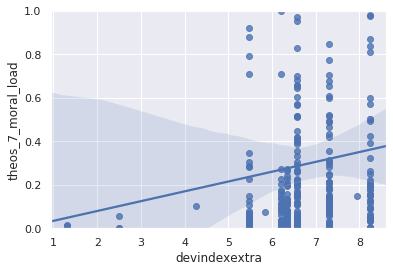

In [0]:
sns.set(color_codes=True)
sns.regplot(x="devindexextra", y="theos_7_moral_load", data=LG_results_theos)
#plt.savefig(gdrive_root + "figures/regr_devindex.png")
plt.ylim(0, 1)

In [0]:
def lin_model_line(dataframe, x_column, y_column, color):
  xd = np.array(dataframe[x_column])
  yd = np.array(dataframe[y_column])
  model_fit = ols(formula=y_column + " ~ " + x_column, data=dataframe).fit()
  a0 = model_fit.params["Intercept"]
  a1 = model_fit.params[x_column]
  y_model = a0 + xd*a1
  #plt.plot(xd, yd, "bo")
  #plt.axis(xmin=xmin, ymin=ymin)
  plt.xlabel(x_column)
  #plt.ylabel(y_column)
  #plt.savefig(gdrive_root + "figures/" + y_column + "_" + x_column + ".png")
  return plt.plot(xd, y_model, color)


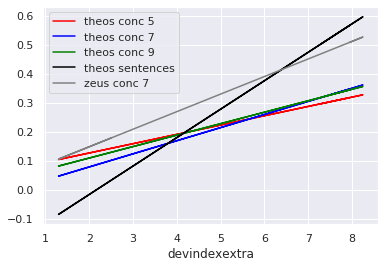

In [0]:
from matplotlib.lines import Line2D ### see https://matplotlib.org/3.1.1/gallery/text_labels_and_annotations/custom_legends.html
lines = []
for column, color in zip(["theos_5_moral_load", "theos_7_moral_load", "theos_9_moral_load", "theos_sent_moral_load"], ["red", "blue", "green", "black"]):
  lin_model_line(LG_results_theos, "devindexextra", column, color)
  lines.append(Line2D([0], [0], color=color))
### add zeus individually
lin_model_line(LG_data_results[LG_data_results["zeus_count"]>0], "devindexextra", "zeus_7_moral_load", "grey")
lines.append(Line2D([0], [0], color="grey"))
plt.legend(lines, ['theos conc 5', 'theos conc 7', 'theos conc 9', 'theos sentences', "zeus conc 7"])
#plt.savefig(gdrive_root + "figures/regr_lines_devindex.png")
plt.show()


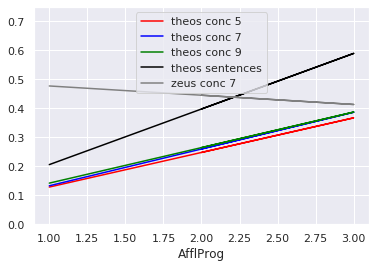

In [0]:
lines = []
for column, color in zip(["theos_5_moral_load", "theos_7_moral_load", "theos_9_moral_load", "theos_sent_moral_load"], ["red", "blue", "green", "black"]):
  lin_model_line(LG_results_theos, "AfflProg", column, color)
  lines.append(Line2D([0], [0], color=color))
plt.legend(lines, ['theos conc 5', 'theos conc 7', 'theos conc 9', 'theos sentences'])
### add zeus individually
lin_model_line(LG_data_results[LG_data_results["zeus_count"]>0], "AfflProg", "zeus_7_moral_load", "grey")
lines.append(Line2D([0], [0], color="grey"))
plt.legend(lines, ['theos conc 5', 'theos conc 7', 'theos conc 9', 'theos sentences', "zeus conc 7"])
plt.ylim(0,0.75)
plt.savefig(gdrive_root + "figures/regr_lines_afflprog.png")
plt.show()

(0, 1)

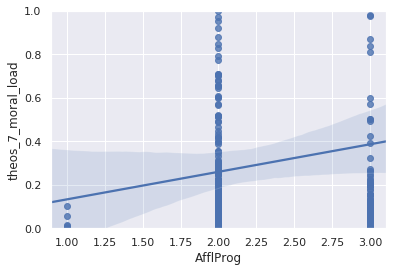

In [0]:
sns.set(color_codes=True)
sns.regplot(x="AfflProg", y="theos_7_moral_load", data=LG_results_theos)
plt.savefig(gdrive_root + "figures/regr_afflprog.png")
plt.ylim(0, 1)

(-1, 1)

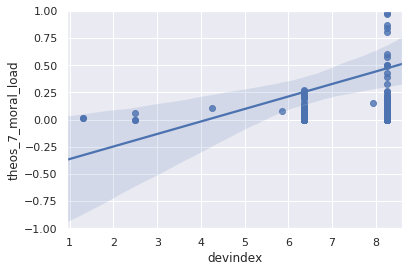

In [0]:
sns.set(color_codes=True)
sns.regplot(x="devindex", y="theos_7_moral_load", data=LG_results_theos[LG_results_theos["century"]<0])
plt.savefig(gdrive_root + "figures/regr_devindex.png")
plt.ylim(-1, 1)

(0, 1)

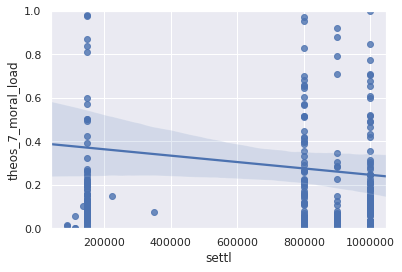

In [0]:
sns.set(color_codes=True)
sns.regplot(x="settl", y="theos_7_moral_load", data=LG_results_theos)
plt.savefig(gdrive_root + "figures/regr_settl.png")
plt.ylim(0, 1)

(0, 1)

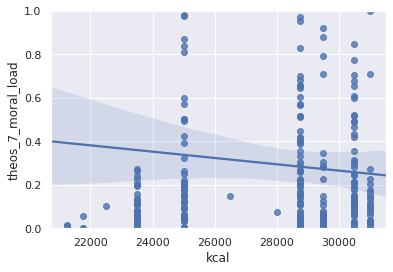

In [0]:
sns.set(color_codes=True)
sns.regplot(x="kcal", y="theos_7_moral_load", data=LG_results_theos)
plt.savefig(gdrive_root + "figures/regr_kcal.png")
plt.ylim(0, 1)

(0, 1)

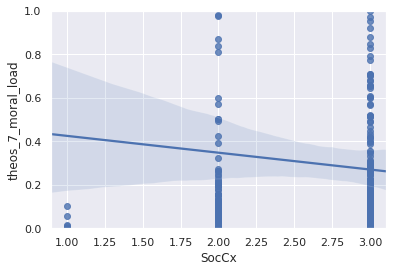

In [0]:
sns.set(color_codes=True)
sns.regplot(x="SocCx", y="theos_7_moral_load", data=LG_results_theos)
plt.savefig(gdrive_root + "figures/SocCx.png")
plt.ylim(0, 1)